# Time Series Analysis

Within this document I complete time series analysis of the two data sets; Spotify listens and the song audio features and Weather.

## To begin with...

### Import Required Packages

In [47]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
## The path where we have datasets
print(os.listdir("./input"))

['.DS_Store', 'historical-hourly-weather-data', 'Sensing-IOT-Data - Spotify.csv', 'Sensing-IOT-Data - Weather.csv', 'stock-time-series-20050101-to-20171231', '__MACOSX']


#### Reading data

Let's First work with Weather data

In [48]:

Weather = pd.read_csv('./input/Sensing-IOT-Data - Weather.csv', index_col ='datetime', parse_dates=['datetime'])
Spotify = pd.read_csv('./input/Sensing-IOT-Data - Spotify.csv', index_col ='datetime', parse_dates=['datetime'])

#Merged data sets to have the same time series- this will be useful for spotify data
combinedData = pd.merge_asof(Weather, Spotify.sort_index(),left_index = True,right_index=True, tolerance = pd.Timedelta("3 minutes"),direction ="nearest").fillna('NAN')
combinedData['track playing'] = combinedData['track playing'].replace('NAN', False)
combinedData['tempo'] = combinedData['tempo'].replace('NAN', 0) 
combinedData['acousticness'] = combinedData['acousticness'].replace('NAN', 0)
combinedData['livelines'] = combinedData['livelines'].replace('NAN', 0)
combinedData['danceability'] = combinedData['danceability'].replace('NAN', 0)
combinedData['speechiness'] = combinedData['speechiness'].replace('NAN', 0)
combinedData['loudness'] = combinedData['loudness'].replace('NAN', 0)
combinedData['energy'] = combinedData['energy'].replace('NAN', 0)
combinedData['instrumentalness'] = combinedData['instrumentalness'].replace('NAN', 0)
combinedData.head(60)



cloud cover  wind speed  temperature  humidity  \
datetime                                                              
2018-12-24 17:09:07         0.29        3.84        41.60      0.88   
2018-12-24 17:12:07         0.30        3.86        41.55      0.88   
2018-12-24 17:15:06         0.31        3.88        41.51      0.88   
2018-12-24 17:18:06         0.32        3.89        41.46      0.88   
2018-12-24 17:21:06         0.33        3.91        41.41      0.88   
2018-12-24 17:24:07         0.33        3.92        41.37      0.89   
2018-12-24 17:27:06         0.34        3.95        41.02      0.89   
2018-12-24 17:30:06         0.35        3.97        40.96      0.89   
2018-12-24 17:33:06         0.36        3.99        40.90      0.89   
2018-12-24 17:36:06         0.37        4.00        40.84      0.89   
2018-12-24 17:39:06         0.37        4.02        40.78      0.89   
2018-12-24 17:42:06         0.58        2.94        39.82      0.90   
2018-12-24 17:45:06         0.58        2.97        39.78      0.90   
2018-12-24 17:48:06         0.18        2.83        39.81      0.90   
2018-12-24 17:51:06         0.15        2.84        39.77      0.90   
2018-12-24 17:54:06         0.12        2.86        39.73      0.90   
2018-12-24 17:57:06         0.10        2.88        39.69      0.90   
2018-12-24 18:00:07         0.07        2.90        39.65      0.90   
2018-12-24 18:03:06         0.09        2.92        39.62      0.90   
2018-12-24 18:06:06         0.54        2.97        39.28      0.90   
2018-12-24 18:09:06         0.53        2.98        39.25      0.90   
2018-12-24 18:12:06         0.52        3.00        39.22      0.90   
2018-12-24 18:15:06         0.51        3.02        39.19      0.91   
2018-12-24 18:18:05         0.50        3.03        39.15      0.91   
2018-12-24 18:21:05         0.49        3.05        39.12      0.91   
2018-12-24 18:24:05         0.48        3.07        39.09      0.91   
2018-12-24 18:27:05         0.47        3.09        39.06      0.91   
2018-12-24 18:30:05         0.46        3.10        39.03      0.91   
2018-12-24 18:33:05         0.45        3.12        38.99      0.91   
2018-12-24 18:36:05         0.44        3.14        38.96      0.91   
2018-12-24 18:39:05         0.43        3.16        38.93      0.91   
2018-12-24 18:42:05         0.42        3.17        38.90      0.91   
2018-12-24 18:45:05         0.52        2.76        38.20      0.92   
2018-12-24 18:48:05         0.51        2.77        38.17      0.92   
2018-12-24 18:51:05         0.50        2.77        38.13      0.92   
2018-12-24 18:54:05         0.49        2.78        38.10      0.92   
2018-12-24 18:57:05         0.49        2.78        38.06      0.92   
2018-12-24 19:00:05         0.48        2.79        38.03      0.92   
2018-12-24 19:03:05         0.47        2.80        38.01      0.92   
2018-12-24 19:06:05         0.46        2.81        37.99      0.92   
2018-12-24 19:09:05         0.44        2.82        37.97      0.92   
2018-12-24 19:12:05         0.43        2.83        37.95      0.92   
2018-12-24 19:15:05         0.42        2.84        37.94      0.92   
2018-12-24 19:18:04         0.41        2.85        37.92      0.92   
2018-12-24 19:21:05         0.40        2.86        37.90      0.92   
2018-12-24 19:24:05         0.39        2.88        37.88      0.92   
2018-12-24 19:27:05         0.38        2.89        37.86      0.92   
2018-12-24 19:30:06         0.36        2.90        37.84      0.92   
2018-12-24 19:33:05         0.35        2.91        37.82      0.92   
2018-12-24 19:36:05         0.34        2.92        37.80      0.92   
2018-12-24 19:39:05         0.33        2.94        37.78      0.92   
2018-12-24 19:42:05         0.47        3.18        36.67      0.95   
2018-12-24 19:45:05         0.46        3.17        36.64      0.95   
2018-12-24 19:48:06         0.45        3.15        36.62      0.95   
2018-12-24 19:51:04         0.44        3.14 

In [49]:
Weather = Weather.iloc[1:]
Weather = Weather.fillna(method = 'ffill')

Spotify = Spotify.iloc[1:]
Spotify = Spotify.fillna(method = 'ffill')

combinedData = combinedData.iloc[1:]

### Initial Visualziation

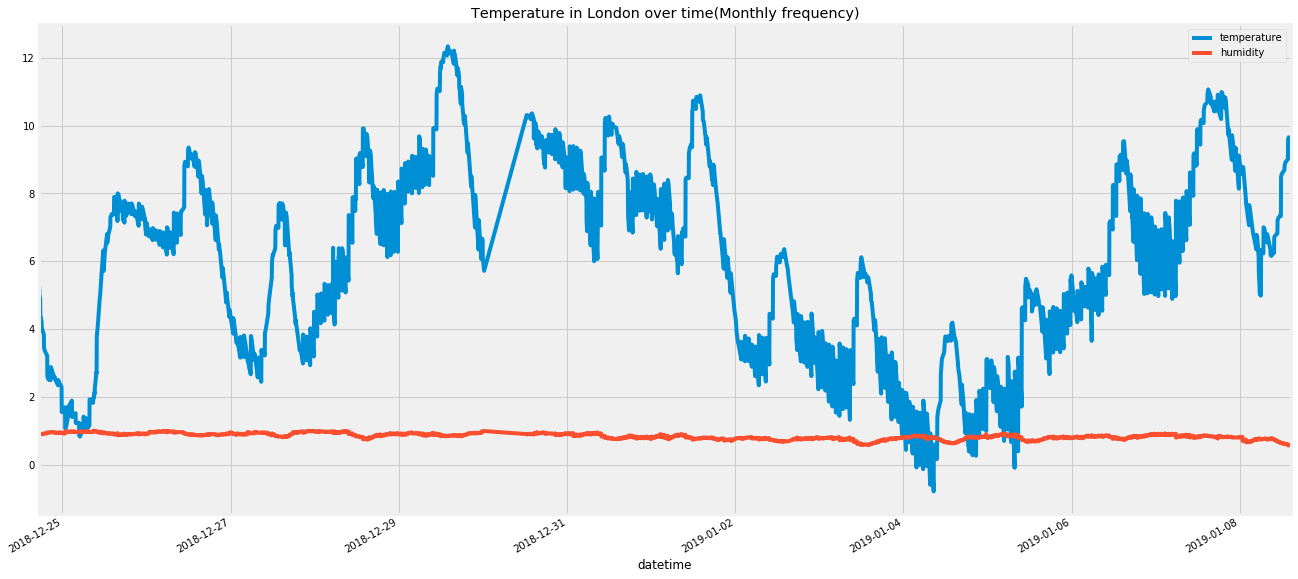

In [50]:
plt.figure(figsize=(20, 10))

Weather['temperature'] = (Weather['temperature']-32)*5/9
Weather['temperature'].plot(label ="temperature") 
Weather['humidity'].plot(label="humidity")
plt.title("Temperature in London over time(Monthly frequency)")
plt.legend()
plt.show()

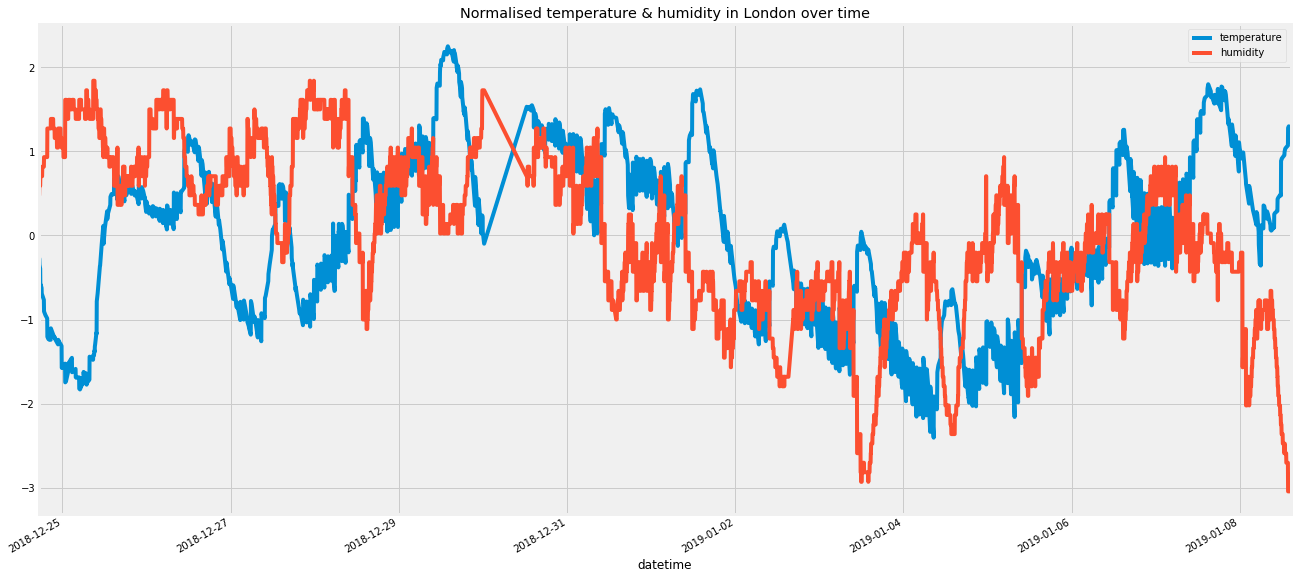

In [51]:
plt.figure(figsize=(20, 10))
city = "Chicago"
#to normalise data take n - mean(n/stdeviation)
#This better shows the corrolation between wind speed & direction
n_temperature = (Weather['temperature'] - np.mean(Weather['temperature']))/np.std(Weather['temperature'])
n_humidity = (Weather['humidity'] - np.mean(Weather['humidity']))/np.std(Weather['humidity'])

n_temperature.plot(label ="temperature") 
n_humidity.plot(label ="humidity") 

plt.title('Normalised temperature & humidity in London over time')
plt.legend()
plt.show()

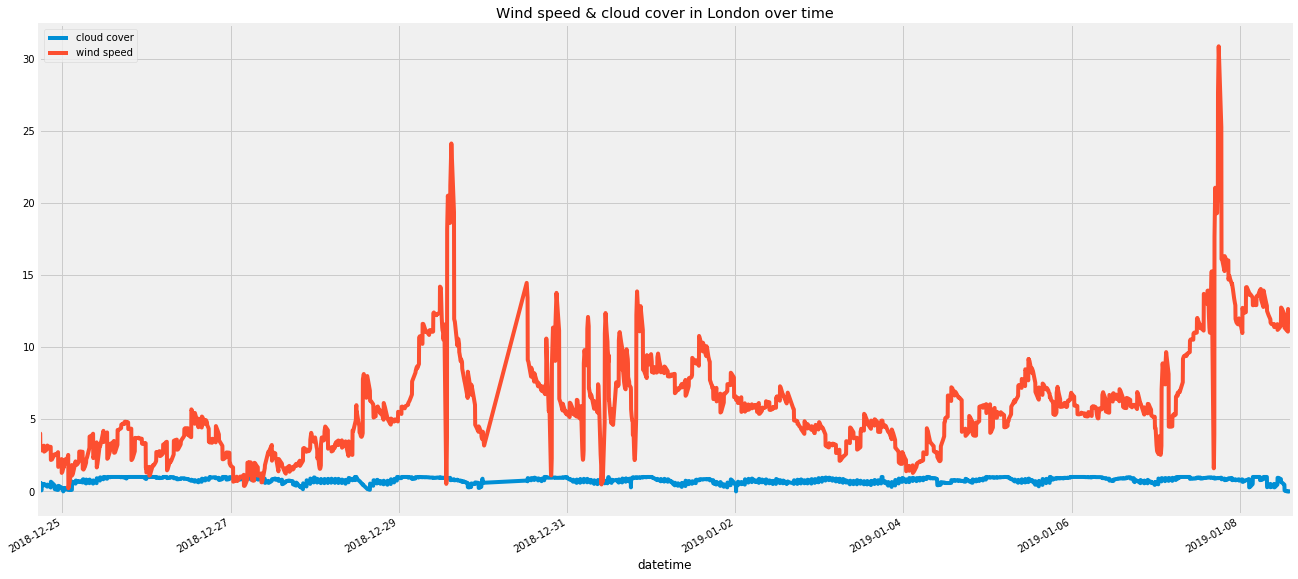

In [52]:
plt.figure(figsize=(20, 10))

Weather['cloud cover'].plot(label ="cloud cover") 
Weather['wind speed'].plot(label ="wind speed") 

plt.title("Wind speed & cloud cover in London over time")
plt.legend()
plt.show()

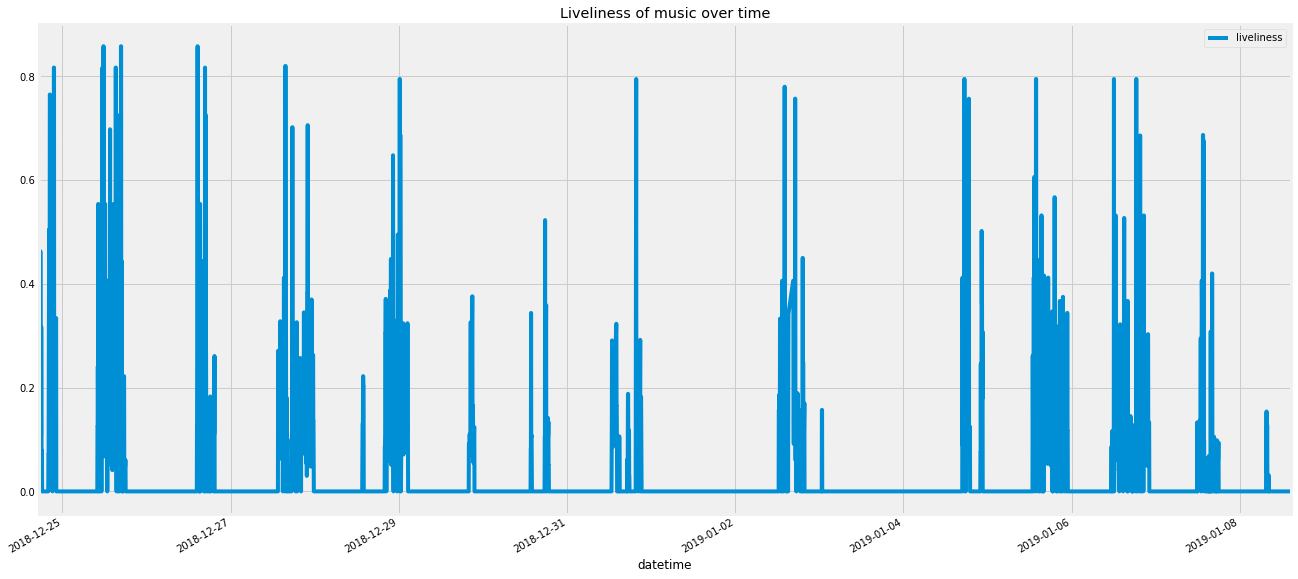

In [53]:
plt.figure(figsize=(20, 10))
combinedData['livelines'].plot(label ="liveliness") 
plt.title("Liveliness of music over time")
plt.legend()
plt.show()

##This data is noisy so needs to be cleaned up

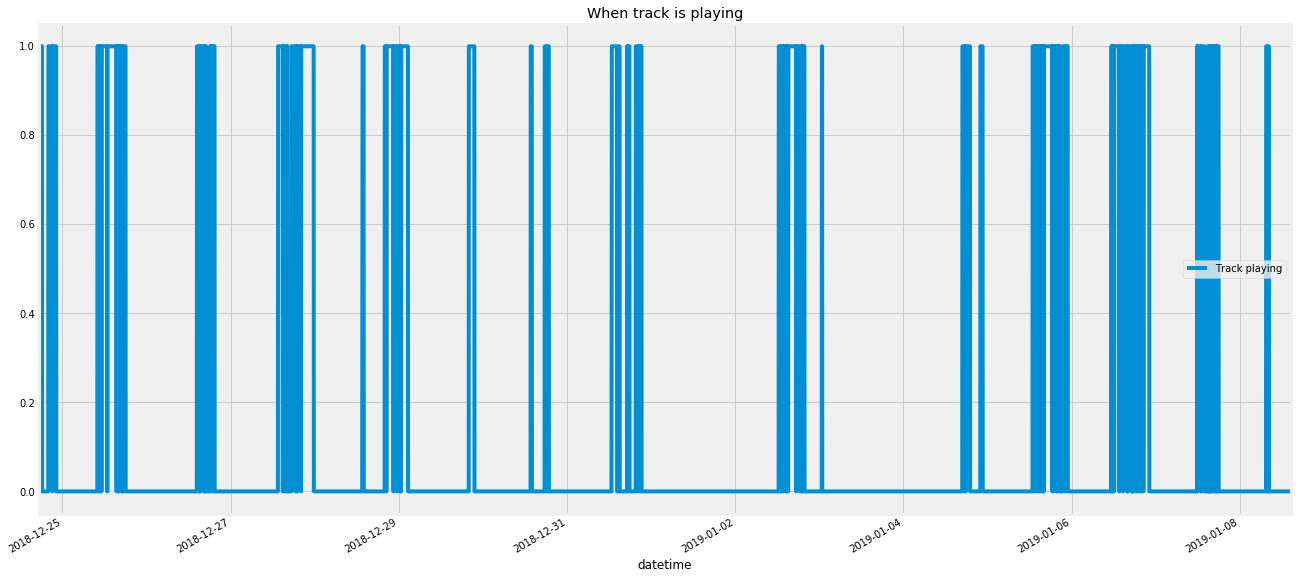

In [54]:
#Plot showing the when tracks are playing
plt.figure(figsize=(20, 10))
combinedData['track playing'].plot(label ="Track playing") 
plt.title("When track is playing")
plt.legend()
plt.show()


#### Normalised Data

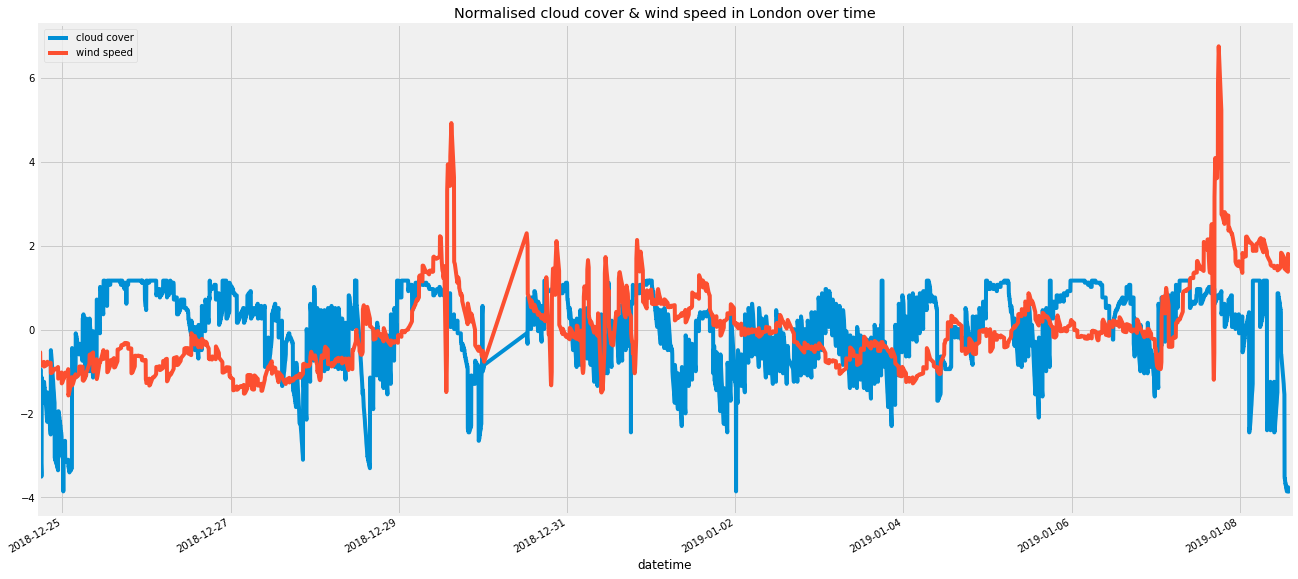

In [55]:
plt.figure(figsize=(20, 10))

#to normalise data take n - mean(n/stdeviation)
#This better shows the corrolation between wind speed & direction
n_cloud = (Weather['cloud cover'] - np.mean(Weather['cloud cover']))/np.std(Weather['cloud cover'])
n_wind = (Weather['wind speed'] - np.mean(Weather['wind speed']))/np.std(Weather['wind speed'])

n_cloud.plot(label ="cloud cover") 
n_wind.plot(label ="wind speed") 

plt.title('Normalised cloud cover & wind speed in London over time')
plt.legend()
plt.show()

So, The correlation between speed and direction can be seen better. 

####  Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

In [56]:
Weather[Weather.index.duplicated()]
Weather = Weather[~Weather.index.duplicated()]
Spotify[Spotify.index.duplicated()]
Spotify = Spotify[~Spotify.index.duplicated()]
combinedData[combinedData.index.duplicated()]
combinedData = combinedData[~combinedData.index.duplicated()]

In [57]:
combinedData.resample('3min', how = 'mean')

cloud cover  wind speed  temperature  humidity  \
datetime                                                              
2018-12-24 17:12:00         0.30        3.86        41.55      0.88   
2018-12-24 17:15:00         0.31        3.88        41.51      0.88   
2018-12-24 17:18:00         0.32        3.89        41.46      0.88   
2018-12-24 17:21:00         0.33        3.91        41.41      0.88   
2018-12-24 17:24:00         0.33        3.92        41.37      0.89   
2018-12-24 17:27:00         0.34        3.95        41.02      0.89   
2018-12-24 17:30:00         0.35        3.97        40.96      0.89   
2018-12-24 17:33:00         0.36        3.99        40.90      0.89   
2018-12-24 17:36:00         0.37        4.00        40.84      0.89   
2018-12-24 17:39:00         0.37        4.02        40.78      0.89   
2018-12-24 17:42:00         0.58        2.94        39.82      0.90   
2018-12-24 17:45:00         0.58        2.97        39.78      0.90   
2018-12-24 17:48:00         0.18        2.83        39.81      0.90   
2018-12-24 17:51:00         0.15        2.84        39.77      0.90   
2018-12-24 17:54:00         0.12        2.86        39.73      0.90   
2018-12-24 17:57:00         0.10        2.88        39.69      0.90   
2018-12-24 18:00:00         0.07        2.90        39.65      0.90   
2018-12-24 18:03:00         0.09        2.92        39.62      0.90   
2018-12-24 18:06:00         0.54        2.97        39.28      0.90   
2018-12-24 18:09:00         0.53        2.98        39.25      0.90   
2018-12-24 18:12:00         0.52        3.00        39.22      0.90   
2018-12-24 18:15:00         0.51        3.02        39.19      0.91   
2018-12-24 18:18:00         0.50        3.03        39.15      0.91   
2018-12-24 18:21:00         0.49        3.05        39.12      0.91   
2018-12-24 18:24:00         0.48        3.07        39.09      0.91   
2018-12-24 18:27:00         0.47        3.09        39.06      0.91   
2018-12-24 18:30:00         0.46        3.10        39.03      0.91   
2018-12-24 18:33:00         0.45        3.12        38.99      0.91   
2018-12-24 18:36:00         0.44        3.14        38.96      0.91   
2018-12-24 18:39:00         0.43        3.16        38.93      0.91   
...                          ...         ...          ...       ...   
2019-01-08 13:18:00         0.02       11.21        48.11      0.60   
2019-01-08 13:21:00         0.01       11.19        48.13      0.60   
2019-01-08 13:24:00         0.01       11.18        48.14      0.60   
2019-01-08 13:27:00         0.00       11.16        48.15      0.60   
2019-01-08 13:30:00         0.00       11.15        48.16      0.60   
2019-01-08 13:33:00         0.00       11.14        48.17      0.60   
2019-01-08 13:36:00         0.00       11.12        48.19      0.60   
2019-01-08 13:39:00         0.00       11.11        48.20      0.60   
2019-01-08 13:42:00         0.00       11.10        48.21      0.60   
2019-01-08 13:45:00         0.00       11.08        48.22      0.60   
2019-01-08 13:48:00         0.02       12.65        49.26      0.57   
2019-01-08 13:51:00         0.01       12.62        49.29      0.57   
2019-01-08 13:54:00         0.00       12.59        49.32      0.57   
2019-01-08 13:57:00         0.00       12.56        49.35      0.57   
2019-01-08 14:00:00         0.00       12.52        49.38      0.57   
2019-01-08 14:03:00         0.00       12.47        49.31      0.57   
2019-01-08 14:06:00         0.00       12.41        49.24      0.57   
2019-01-08 14:09:00         0.00       12.36        49.17      0.57   
2019-01-08 14:12:00         0.00       12.30        49.10      0.57   
2019-01-08 14:15:00         0.00       12.24        49.03      0.57   
2019-01-08 14:18:00         0.00       12.19        48.96      0.58   
2019-01-08 14:21:00         0.00       12.13        48.89      0.58   
2019-01-08 14:24:00         0.00       12.08        48.82      0.58   
2019-01-08 14:27:00         0.00       12.02 

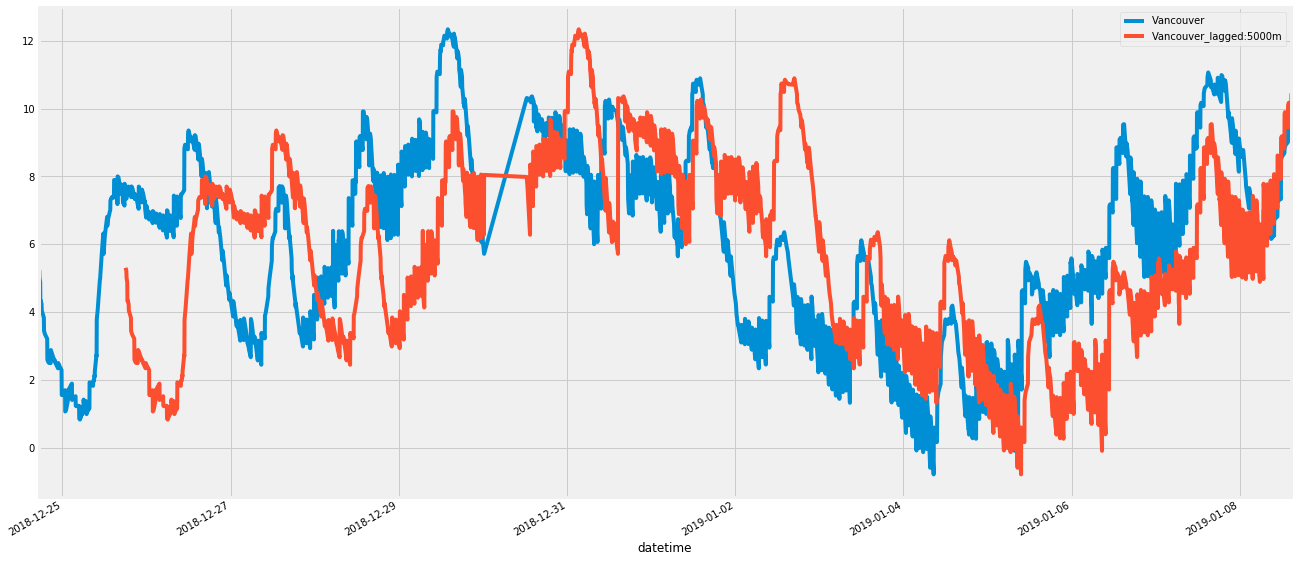

In [58]:
plt.figure(figsize=(20, 10))
freq = 'm'
shift_size = 5000
Weather["temperature"].plot(legend=True)
shifted = Weather["temperature"].shift(500).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged:'+str(shift_size)+str(freq)])
plt.show()

##Shifting data by 1 day


### Resampling
**Upsampling** - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.


We have seen **ffill** before: it propagates last valid observation to fill gaps (fill values forward).

If we use **bfill**, it propogates next valid observation to fill gaps (fill values backward).

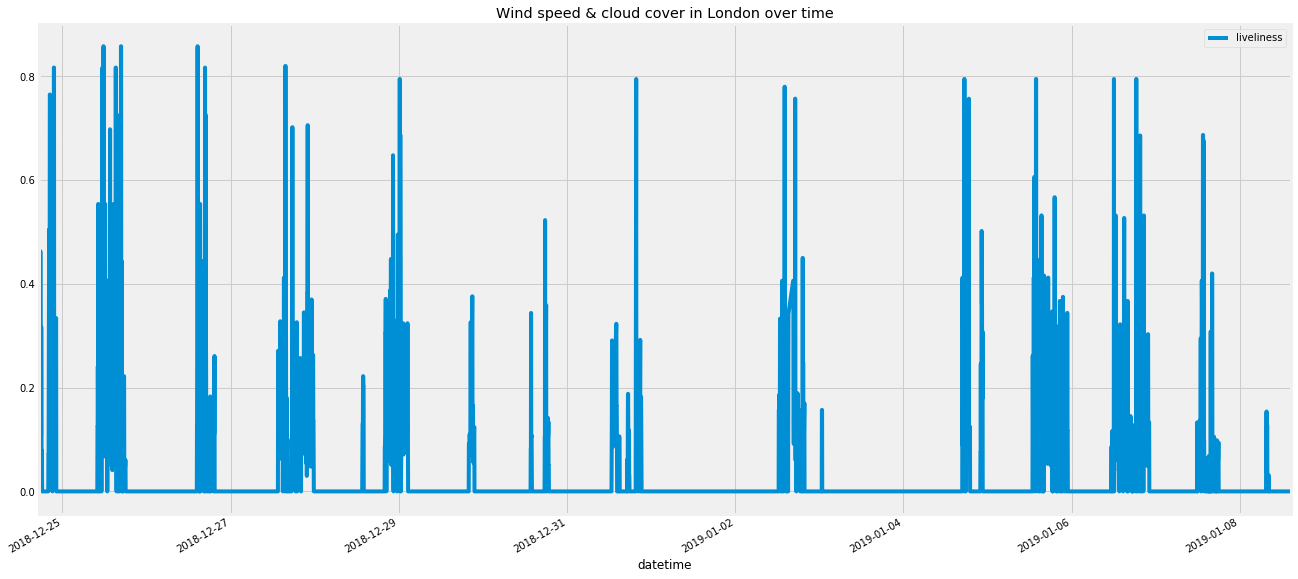

In [59]:
plt.figure(figsize=(20, 10))
combinedData['livelines'].plot(label ="liveliness") 
plt.title("Wind speed & cloud cover in London over time")
plt.legend()
plt.show()


(6825,)


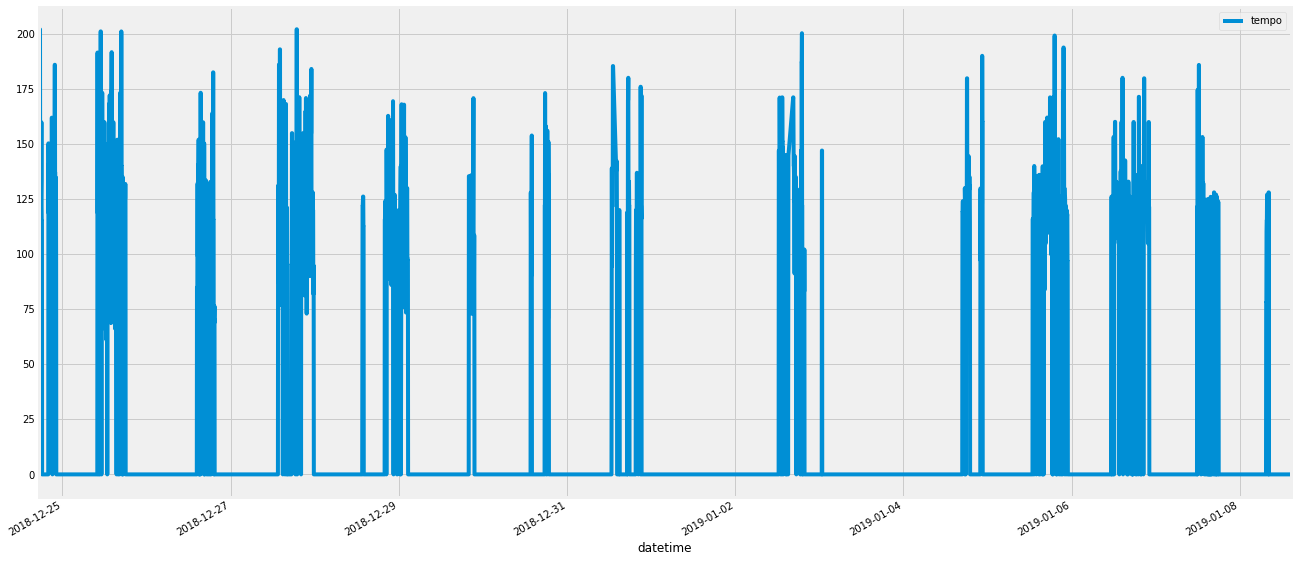

In [60]:
ts = combinedData["tempo"]
print(ts.shape)
plt.figure(figsize=(20, 10))

ts.plot(legend=True)
plt.show()

(716,)


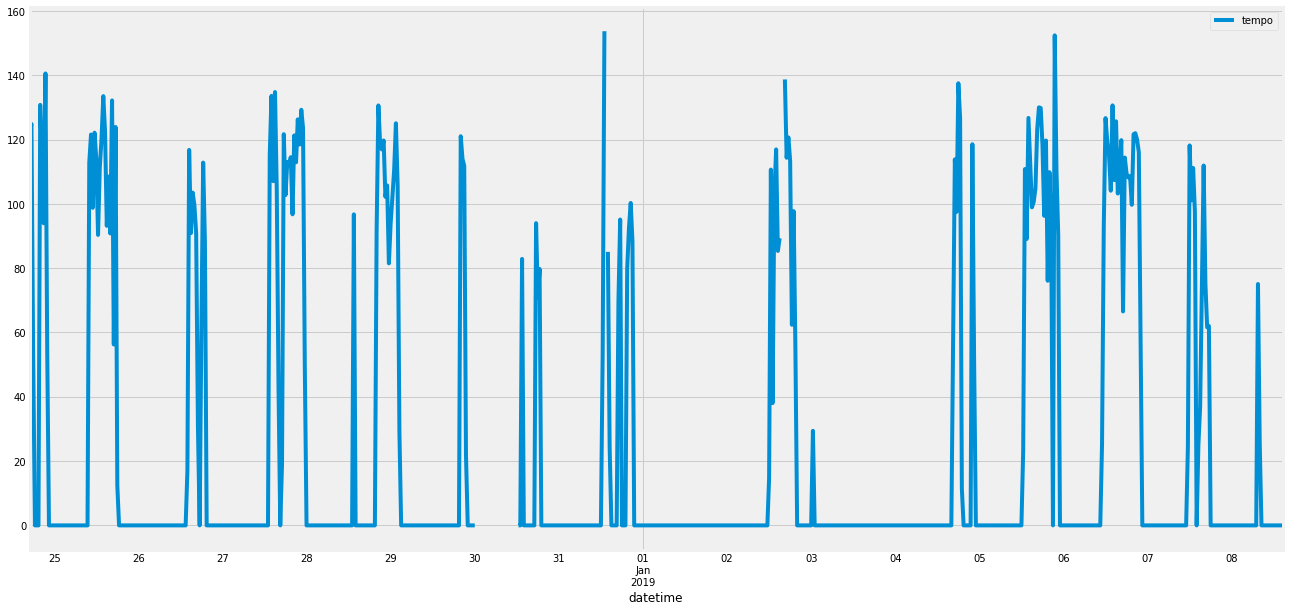

In [61]:
# We downsample from hourly to 7 day frequency aggregated using mean
ts = ts.resample('30min').mean()
print(ts.shape)
plt.figure(figsize=(20, 10))
ts.plot(legend=True)
plt.show()

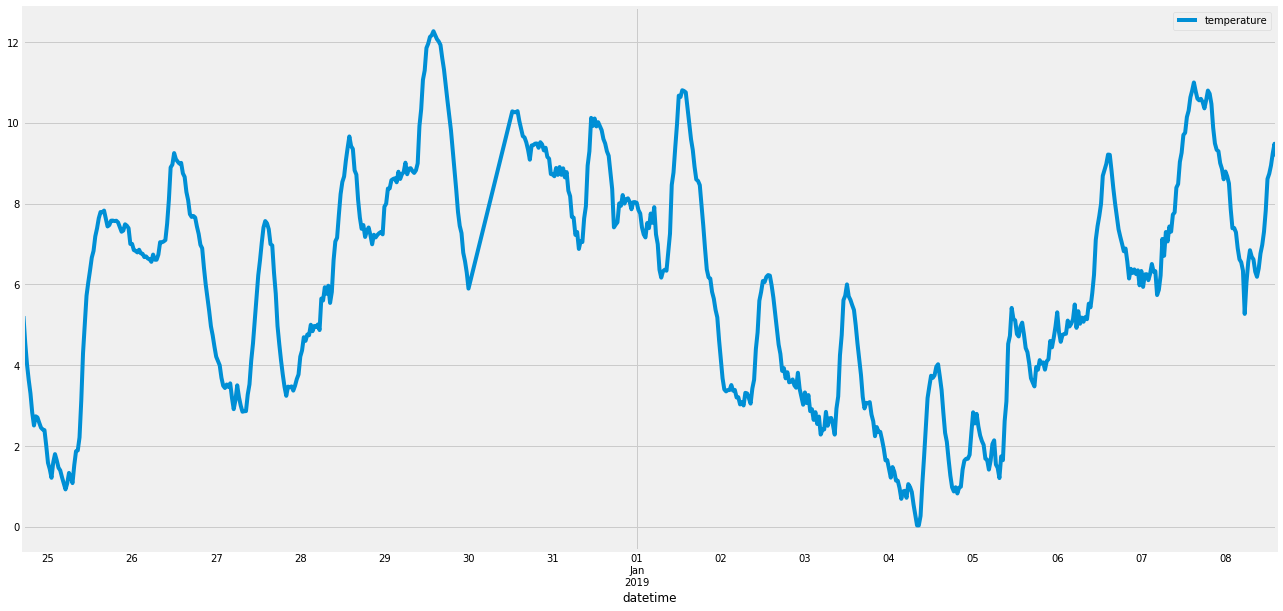

In [62]:
Weather = Weather.resample('30min').mean()
Weather = Weather.interpolate()
plt.figure(figsize=(20, 10))
Weather['temperature'].plot(legend=True)
plt.show()

### Autocorrelation 
* The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

716


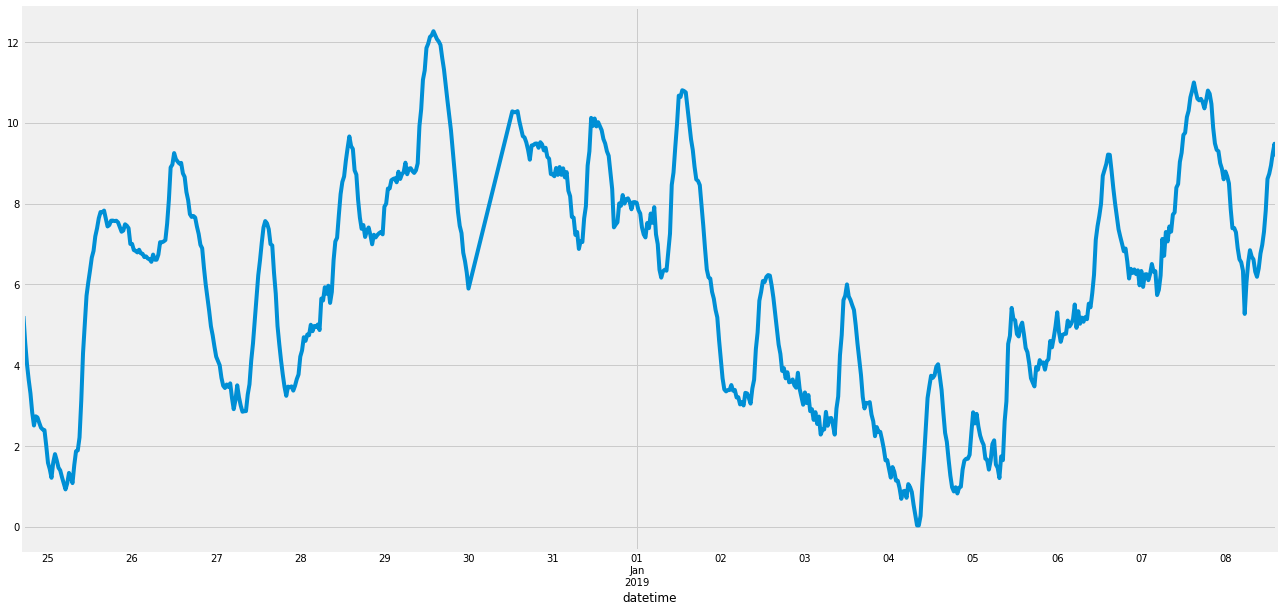

In [64]:
ts = Weather['temperature']
plt.figure(figsize=(20, 10))#
ts.plot()
print(len(Weather['temperature']))

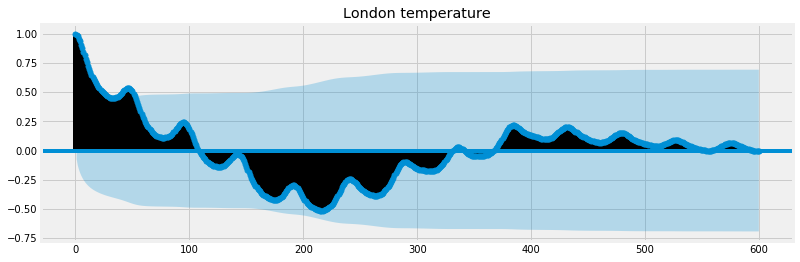

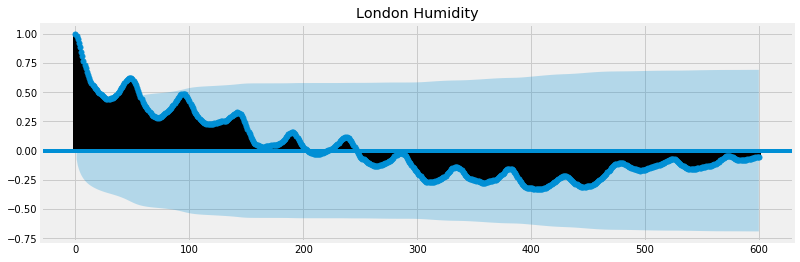

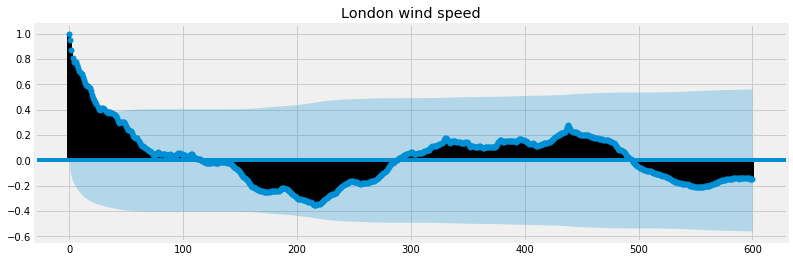

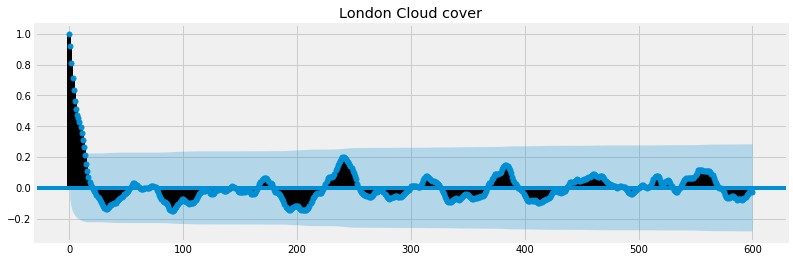

In [65]:
#lags = 6820, this is the entire data set
# Autocorrelation of temperature in London
acf = plot_acf(ts,lags=600 ,title="London temperature")
acf.set_figheight(4)
acf.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(Weather['humidity'],lags=600 ,title="London Humidity")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of wind speed in London
bt = plot_acf(Weather['wind speed'],lags=600 ,title="London wind speed")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(Weather['cloud cover'],lags=600 ,title="London Cloud cover")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()


As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

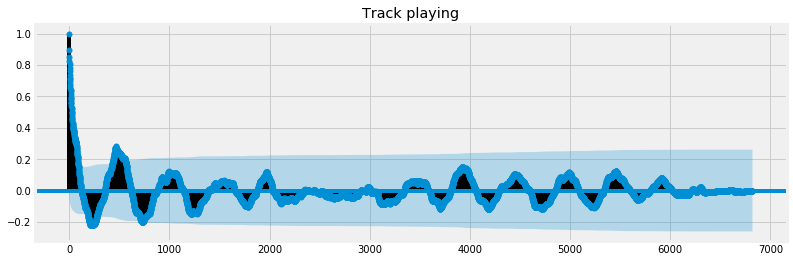

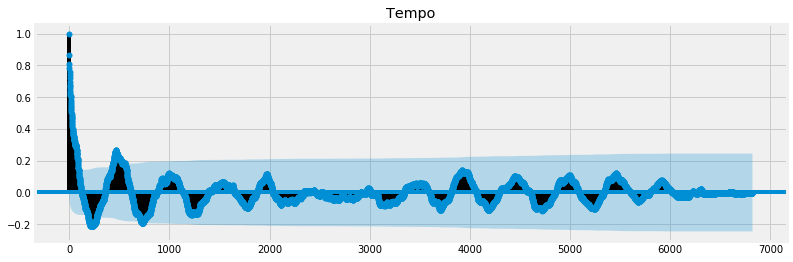

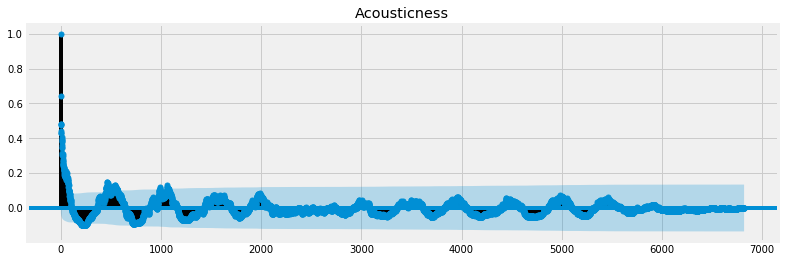

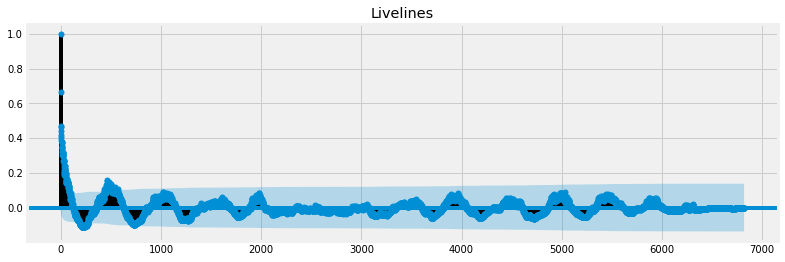

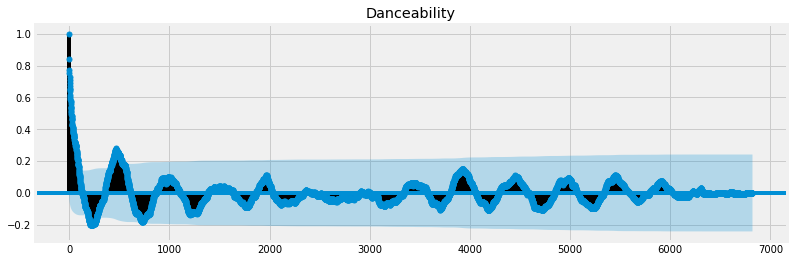

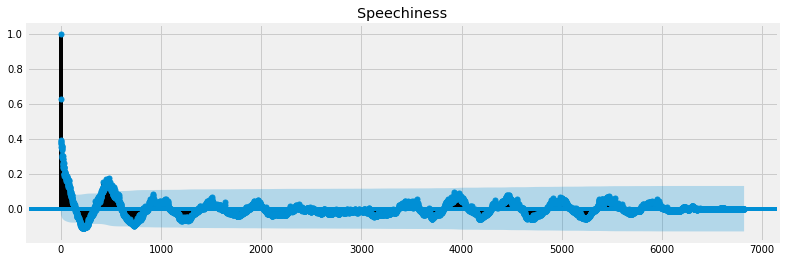

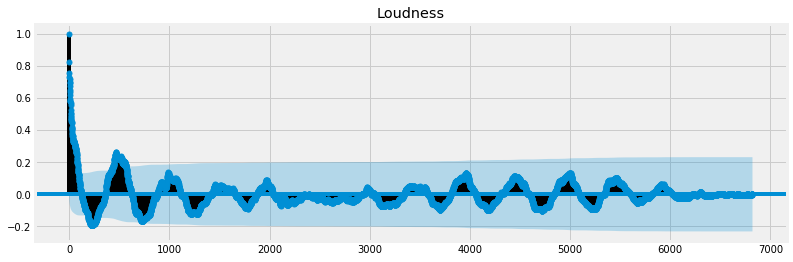

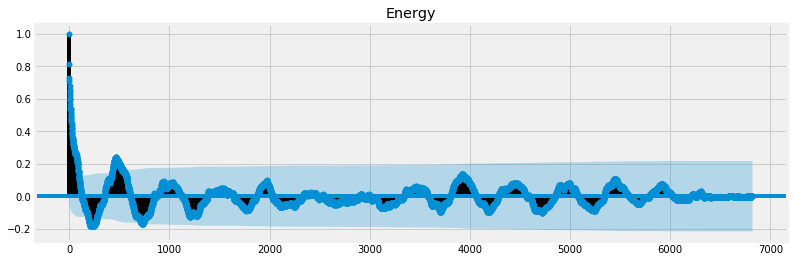

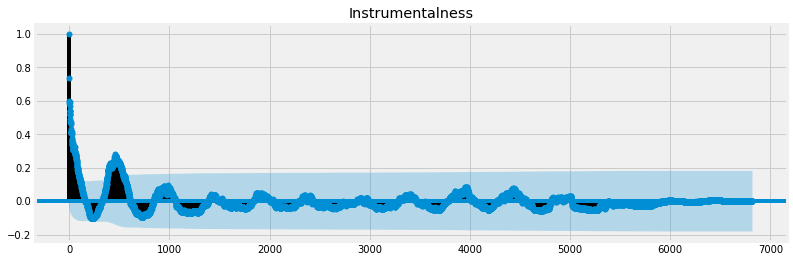

In [66]:
# Autocorrelation of spotify data
bt = plot_acf(combinedData['track playing'],lags=6820 ,title="Track playing")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['tempo'],lags=6820 ,title="Tempo")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['acousticness'],lags=6820 ,title="Acousticness")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['livelines'],lags=6820 ,title="Livelines")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['danceability'],lags=6820 ,title="Danceability")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['speechiness'],lags=6820 ,title="Speechiness")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['loudness'],lags=6820 ,title="Loudness")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['energy'],lags=6820 ,title="Energy")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()

# Autocorrelation of humidity in London
bt = plot_acf(combinedData['instrumentalness'],lags=6820 ,title="Instrumentalness")
bt.set_figheight(4)
bt.set_figwidth(12)
plt.show()



### Partial Autocorrelation
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags.  The terms can be interpreted the same way as a standard  linear regression, that is the contribution of a change in that particular lag while holding others constant. 


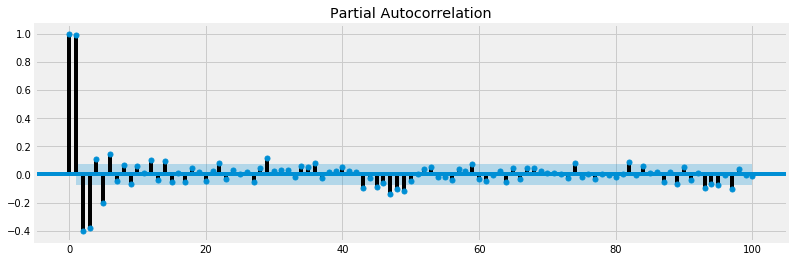

In [67]:
# Partial Autocorrelation of temperature in London --> not statistically significant
pacf = plot_pacf(Weather["temperature"],lags=100)
pacf.set_figheight(4)
pacf.set_figwidth(12)
plt.show()

Partial autocorrelation after first 2 lags is very low.

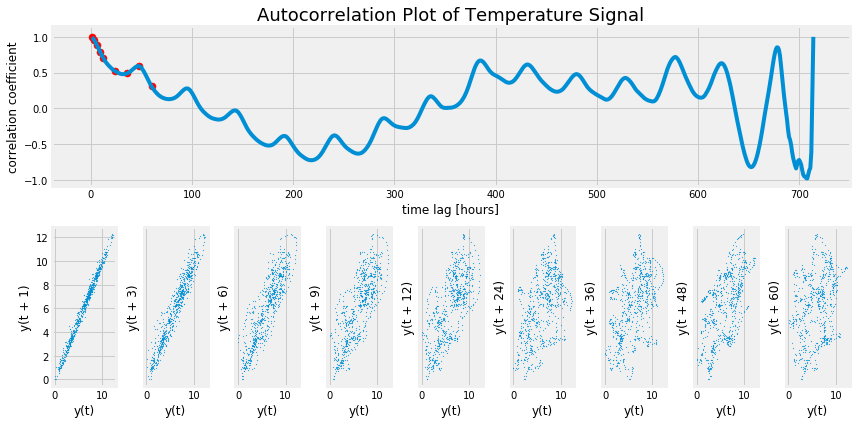

In [68]:
#%% show autocorr and lag plots
import matplotlib.gridspec as gridspec
from pandas.plotting import autocorrelation_plot, lag_plot


selectedLagPoints = [1,3,6,9,12,24,36,48,60]
maxLagDays =40

originalSignal = Weather["temperature"]

# set grid spec of the subplots
plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, len(selectedLagPoints))
axTopRow = plt.subplot(gs[0, :])
axBottomRow = []
for i in range(len(selectedLagPoints)):
    axBottomRow.append(plt.subplot(gs[1, i]))

# plot autocorr
allTimeLags = np.arange(1,maxLagDays*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in allTimeLags]
axTopRow.plot(allTimeLags,autoCorr); 
axTopRow.set_title('Autocorrelation Plot of Temperature Signal', fontsize=18);
axTopRow.set_xlabel('time lag [hours]'); axTopRow.set_ylabel('correlation coefficient')
selectedAutoCorr = [originalSignal.autocorr(lag=dt) for dt in selectedLagPoints]
axTopRow.scatter(x=selectedLagPoints, y=selectedAutoCorr, s=50, c='r')

# plot scatter plot of selected points
for i in range(len(selectedLagPoints)):
    lag_plot(originalSignal, lag=selectedLagPoints[i], s=0.5, alpha=0.7, ax=axBottomRow[i])    
    if i >= 1:
        axBottomRow[i].set_yticks([],[])
plt.tight_layout()

The top row shows the auto-correlation plot.
The bottom scatter plots correspond to the red points marked on the auto-correlation plot.

The leftmost plot shows the Temperature at time t vs Temperature at time t + 1 hour scatter plot. We know that weather doesn't change that much in one hour and therefore we see extreemly high correlation between the temeratures there.
This correlation gradually decreases up to 12 hour difference, that corresponds to the switch from day to night, and then contiues to oscillate with a slow decreasing trend as the days go by.

### Trends, seasonality and noise

These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

In [69]:
print(len(Weather["temperature"]))

716


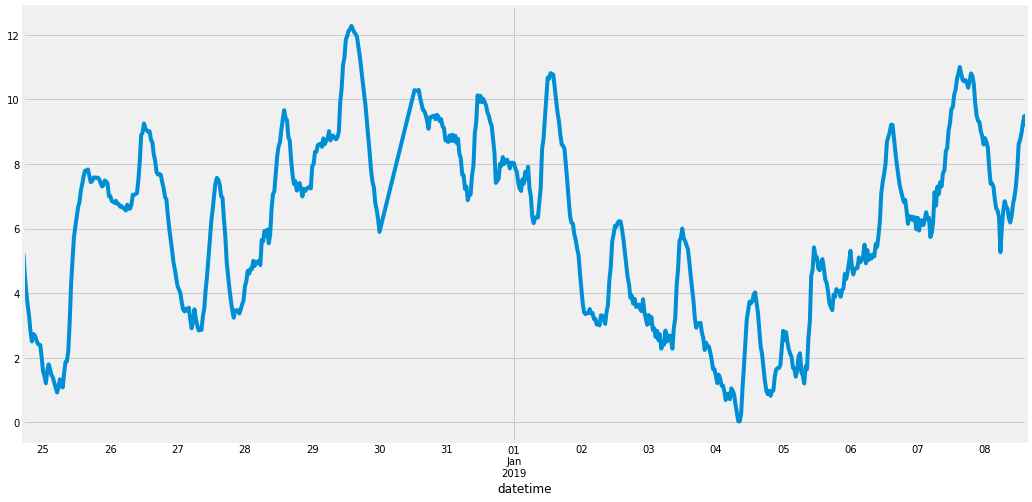

In [70]:
alb = Weather["temperature"]
alb.plot(figsize=(16,8))

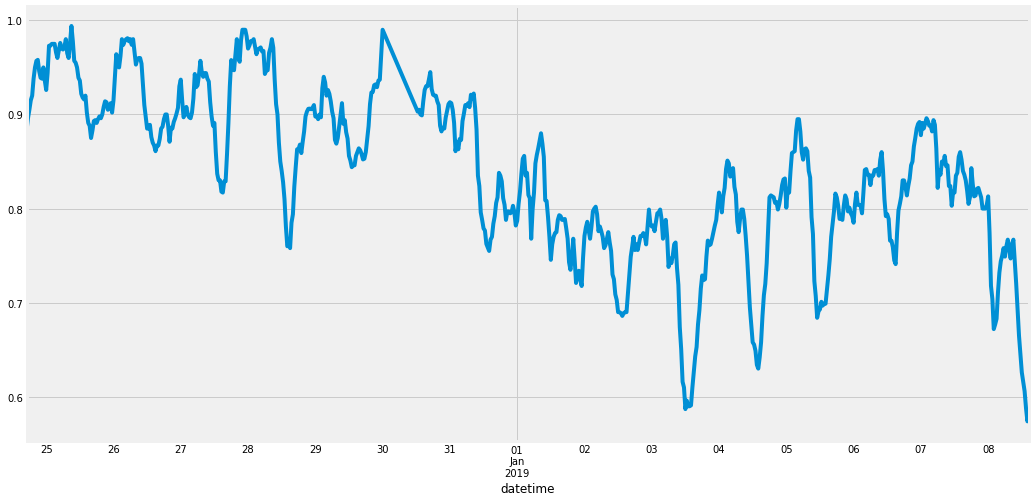

In [71]:
mnt = Weather["humidity"]
mnt.plot(figsize=(16,8))

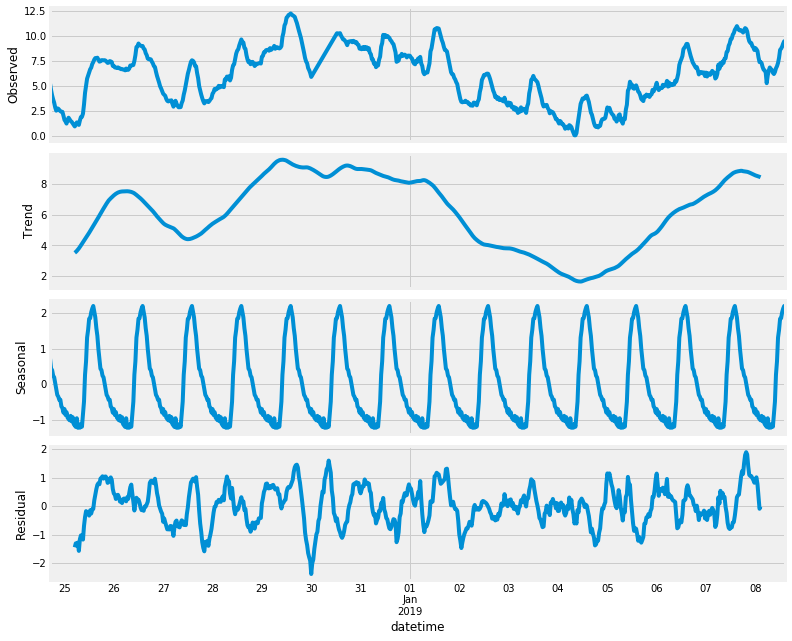

In [72]:
# Now, for decomposition...
ts =alb
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ts,freq=48) # The frequncy is annual
figure = decomposed.plot()
plt.show()

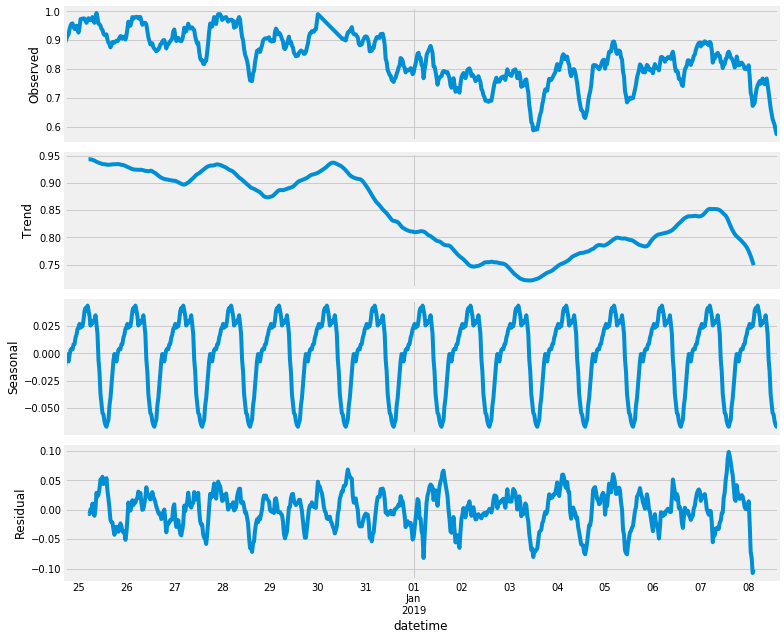

In [73]:
# Now, for decomposition...
ts =mnt
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ts,freq=48) # The frequncy is annual
figure = decomposed.plot()
plt.show()

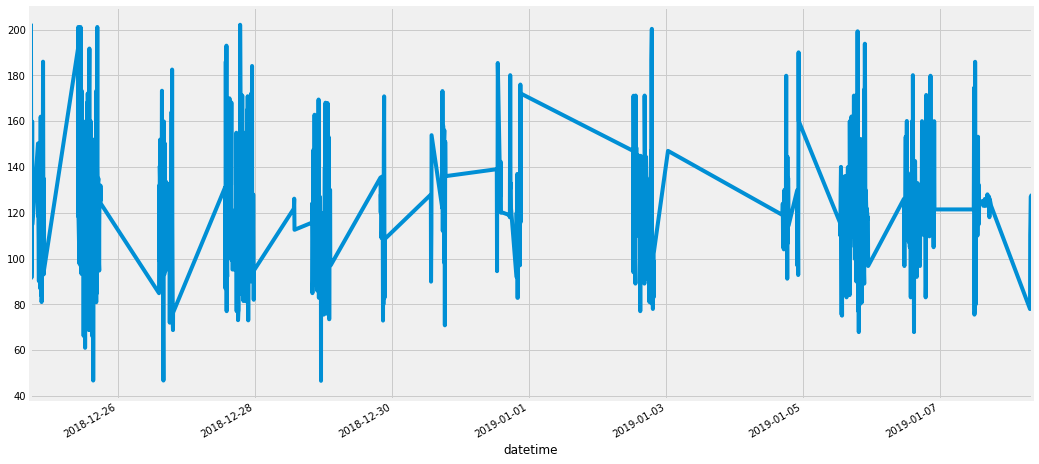

In [74]:
tempo = Spotify["tempo"]
tempo.plot(figsize=(16,8))

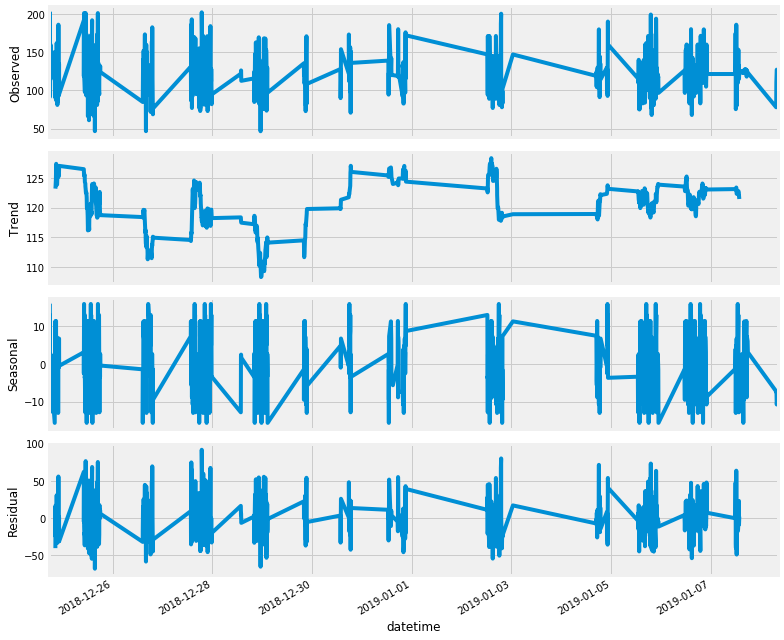

In [75]:
# Now, for decomposition...

#decomp frequecy = 24*50/30 * 7 
alb =tempo
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(alb,freq=48) # The frequncy is annual
figure = decomposed.plot()
plt.show()

## FFT: Fast Fourier Transform

As we can see the FFT works! It has given us information about the frequencies of the waves in the time signal.

A FFT is a trade-off between time information and frequency information. By taking a FFT of a time signal, all time information is lost in return for frequency information. To keep information about time and frequencies in one spectrum, we must make a spectrogram. These are DFT’s taken on discrete time windows.

### For Weather Data

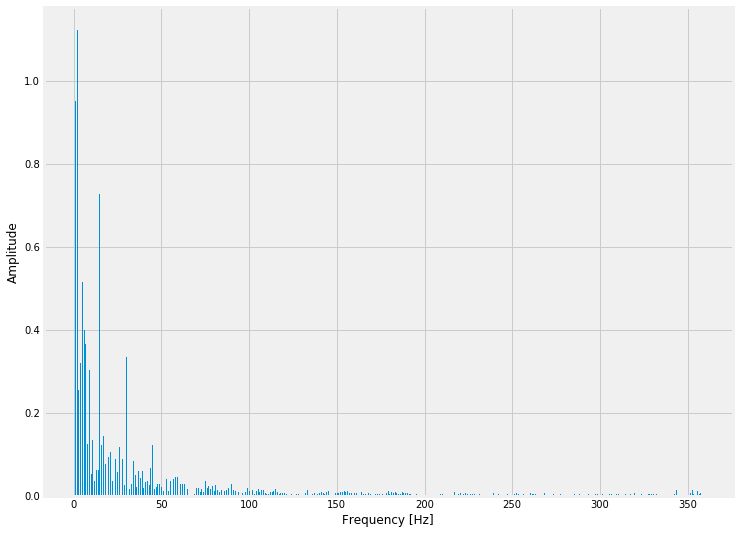

In [76]:
ts = Weather["temperature"]
fft = np.fft.fft(ts)

T = 48  # Daily
N = ts.size

f = np.linspace(0, N, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[1:N // 2], np.abs(fft)[1:N // 2] * 1 / N, width=.5)  # 1 / N is a normalization factor
plt.show()


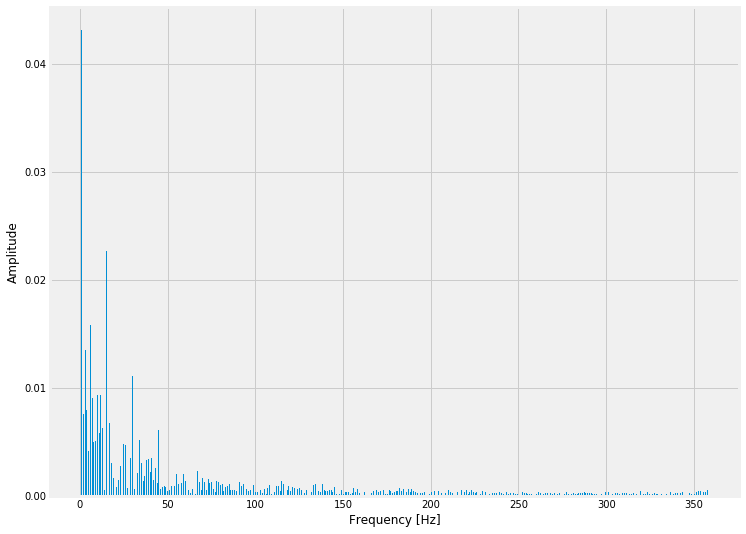

In [77]:
ts = Weather["humidity"]
fft = np.fft.fft(ts)

T = 48  # Daily
N = ts.size

f = np.linspace(0, N, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[1:N // 2], np.abs(fft)[1:N // 2] * 1 / N, width=.5)  # 1 / N is a normalization factor
plt.show()


### For Weather Data

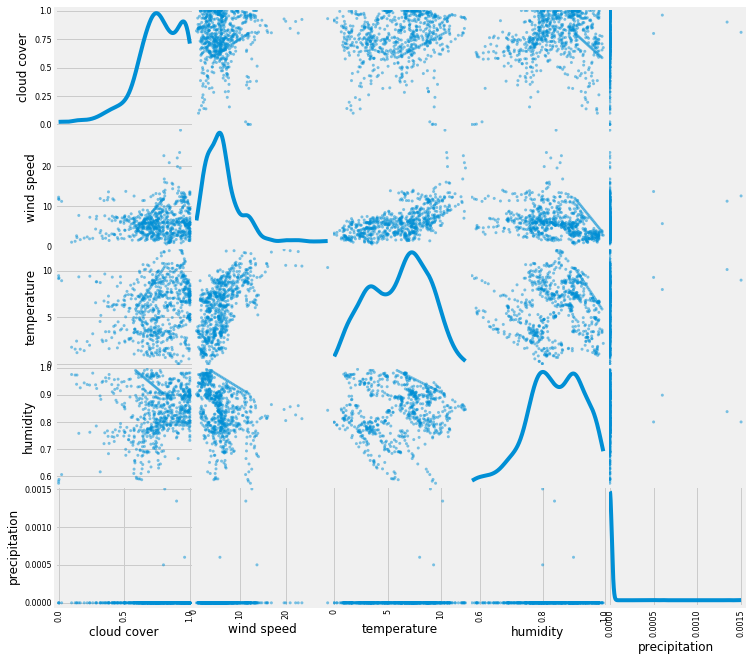

In [78]:
#JM, AB

                                                                  # and 'diagnosis' as it is categorical
Weather.drop(Weather.columns[-1], axis=1, inplace=True) # dropping ID

fig = pd.scatter_matrix(Weather, diagonal = 'kde', figsize = (11,11))


In [79]:
Spotify.head()

track name              artist  \
datetime                                                                   
2018-12-24 17:08:33                        Tired Boy       Joey Pecoraro   
2018-12-24 17:12:48            That Lady, Pts. 1 & 2  The Isley Brothers   
2018-12-24 17:18:23                      Tru Dancing             O'Flynn   
2018-12-24 17:21:05  All I Want for Christmas Is You        Mariah Carey   
2018-12-24 17:25:05      Last Christmas - Remastered      George Michael   

                          album name  track duration  \
datetime                                               
2018-12-24 17:08:33        Tired Boy          255049   
2018-12-24 17:12:48              3+3          334386   
2018-12-24 17:18:23      Tru Dancing          345769   
2018-12-24 17:21:05  Merry Christmas          241106   
2018-12-24 17:25:05      Twenty Five          267160   

                                                        abum image url  \
datetime                                                                 
2018-12-24 17:08:33  https://i.scdn.co/image/a349cd87ed01dd843176e0...   
2018-12-24 17:12:48  https://i.scdn.co/image/fd8a9b405bb14911a5ef5a...   
2018-12-24 17:18:23  https://i.scdn.co/image/634e38f47dd09cf7072cd5...   
2018-12-24 17:21:05  https://i.scdn.co/image/e06f3ddadf59ee24504fc0...   
2018-12-24 17:25:05  https://i.scdn.co/image/4b9473369471a651b81733...   

                                                           spotify url  \
datetime                                                                 
2018-12-24 17:08:33  https://open.spotify.com/track/4SkTfsjWUy2rp40...   
2018-12-24 17:12:48  https://open.spotify.com/track/46pW0poQYEb2bVa...   
2018-12-24 17:18:23  https://open.spotify.com/track/5e1Dlb6sQFBS83u...   
2018-12-24 17:21:05  https://open.spotify.com/track/0bYg9bo50gSsH3L...   
2018-12-24 17:25:05  https://open.spotify.com/track/6wn2nmFn3wDuiMl...   

                                         spotify track id      genre  \
datetime                                                               
2018-12-24 17:08:33  spotify:track:4SkTfsjWUy2rp40d2Ayfmv        NaN   
2018-12-24 17:12:48  spotify:track:46pW0poQYEb2bVaqozGO59        NaN   
2018-12-24 17:18:23  spotify:track:5e1Dlb6sQFBS83u7DzzEdZ        NaN   
2018-12-24 17:21:05  spotify:track:0bYg9bo50gSsH3LtXe2SQn  christmas   
2018-12-24 17:25:05  spotify:track:6wn2nmFn3wDuiMldRiuRuL  christmas   

                     track playing    tempo  acousticness  livelines  \
datetime                                                               
2018-12-24 17:08:33           True   82.819        0.6160     0.0878   
2018-12-24 17:12:48           True  126.318        0.2610     0.3350   
2018-12-24 17:18:23           True  116.998        0.0214     0.0458   
2018-12-24 17:21:05           True  150.277        0.1640     0.0708   
2018-12-24 17:25:05           True  106.856        0.2620     0.2210   

                     danceability  speechiness  loudness  energy  \
datetime                                                           
2018-12-24 17:08:33         0.661       0.0413    -4.240   0.391   
2018-12-24 17:12:48         0.344       0.0606    -9.112   0.769   
2018-12-24 17:18:23         0.752       0.0597    -9.964   0.741   
2018-12-24 17:21:05         0.335       0.0386    -7.462   0.625   
2018-12-24 17:25:05         0.757       0.0282    -7.964   0.618   

                     instrumentalness  
datetime                               
2018-12-24 17:08:33          0.856000  
2018-12-24 17:12:48          0.000122  
2018-12-24 17:18:23          0.924000  
2018-12-24 17:21:05          0.000000  
2018-12-24 17:25:05          0.000000

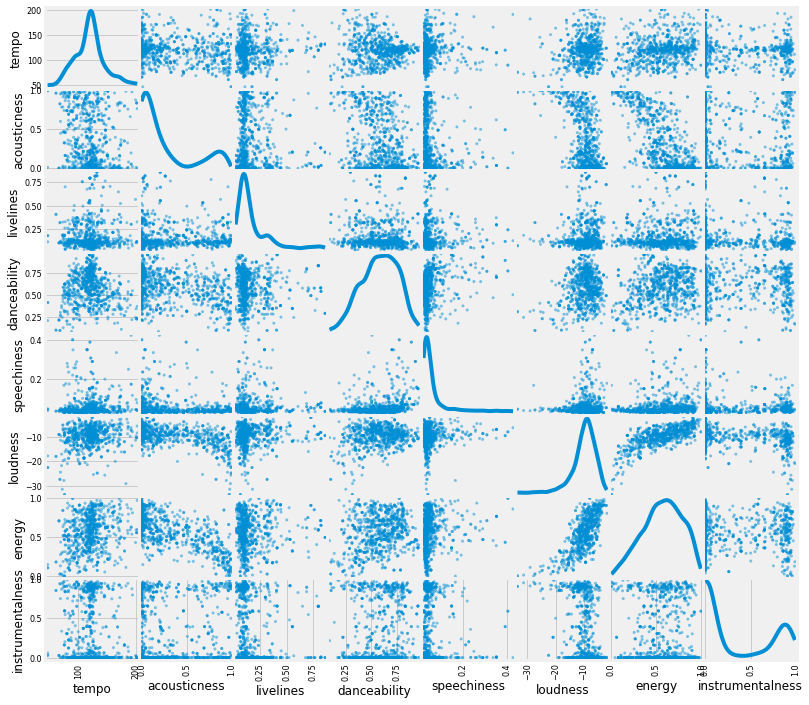

In [80]:
#JM, AB

                                                                  # and 'diagnosis' as it is categorical
Spotify.drop(Spotify.columns[1:9], axis=1, inplace=True) # dropping ID

fig = pd.scatter_matrix(Spotify, diagonal = 'kde', figsize = (12,12))


In [81]:
# Reformat data so all can be correlated 
TF = combinedData['track playing']
combinedData.drop(combinedData.columns[4], axis=1, inplace=True)
combinedData.drop(combinedData.columns[5:15], axis=1, inplace=True)


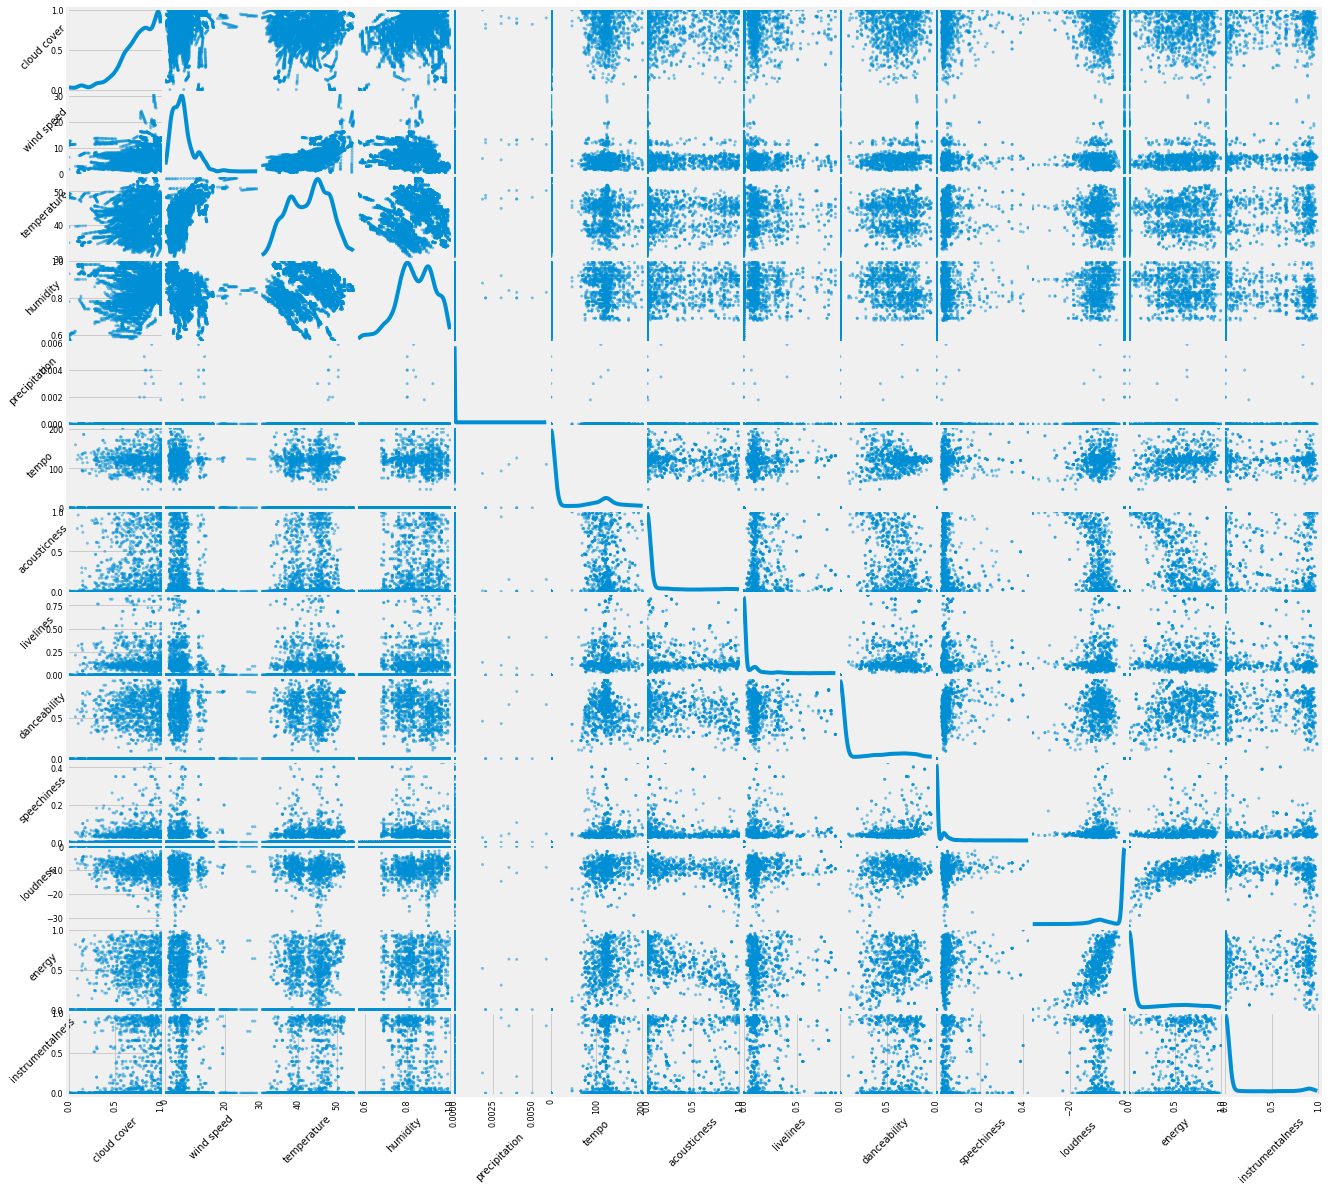

In [87]:
fig = pd.scatter_matrix(combinedData, diagonal = 'kde', figsize = (20,20))


for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 45)

In [ ]:
len(combinedData.columns)

In [ ]:
column_list = list(combinedData.columns)

mainfig = plt.figure(figsize=(15,20))
i = 1
for column in column_list:
    ax = mainfig.add_subplot(6,5,i)
    sns.violinplot(x = column, data = combinedData, ax=ax, color="lightgreen")
    ax.set_xlabel(column)
    ax.set_ylabel('Distribution')
    i = i+1

In [ ]:
#JL, AB

train = combinedData
#train.drop(train.columns[0], axis=1, inplace=True)
columns = list(train.columns)
#columns.remove('diagnosis')

mainfig = plt.figure(figsize=(15,18))
i = 1
for column in columns:
    ax = mainfig.add_subplot(6,5,i)
    n, bins, patches = ax.hist(train[column], bins = 50)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    i = i+1


In [ ]:
i = 1
for column in columns:
        ax = mainfig.add_subplot(6,5,i)
        boxplot(train['column'])